In [30]:
# to get the idea of ROC and AUC and understand their importance
# This explanation of ROC curve is based on an example of logistic regression

# Receiver Operating Characteristics (ROC) curve and 
# Area Under ROC curve (AUC)


### In Nutshell

ROC is typically used for binary classification. It summarizes all the confusion matrices that each threshold produce. Confusion matrix is a matrix that is used to determine the performance of the classification models for a given set of test data. ROC curve is useful to identify the best threshold to make a decision. In ROC plot, any point closest to 1 of True Positive Response (TPR) the threshold corresponding to that point is the optimal threshold.

On other hand AUC helps to decide which categorization is better. Larger the area of ROC for particular method (characterization) better is the method. 



## ROC Curve

Image Credit: Wikipedia


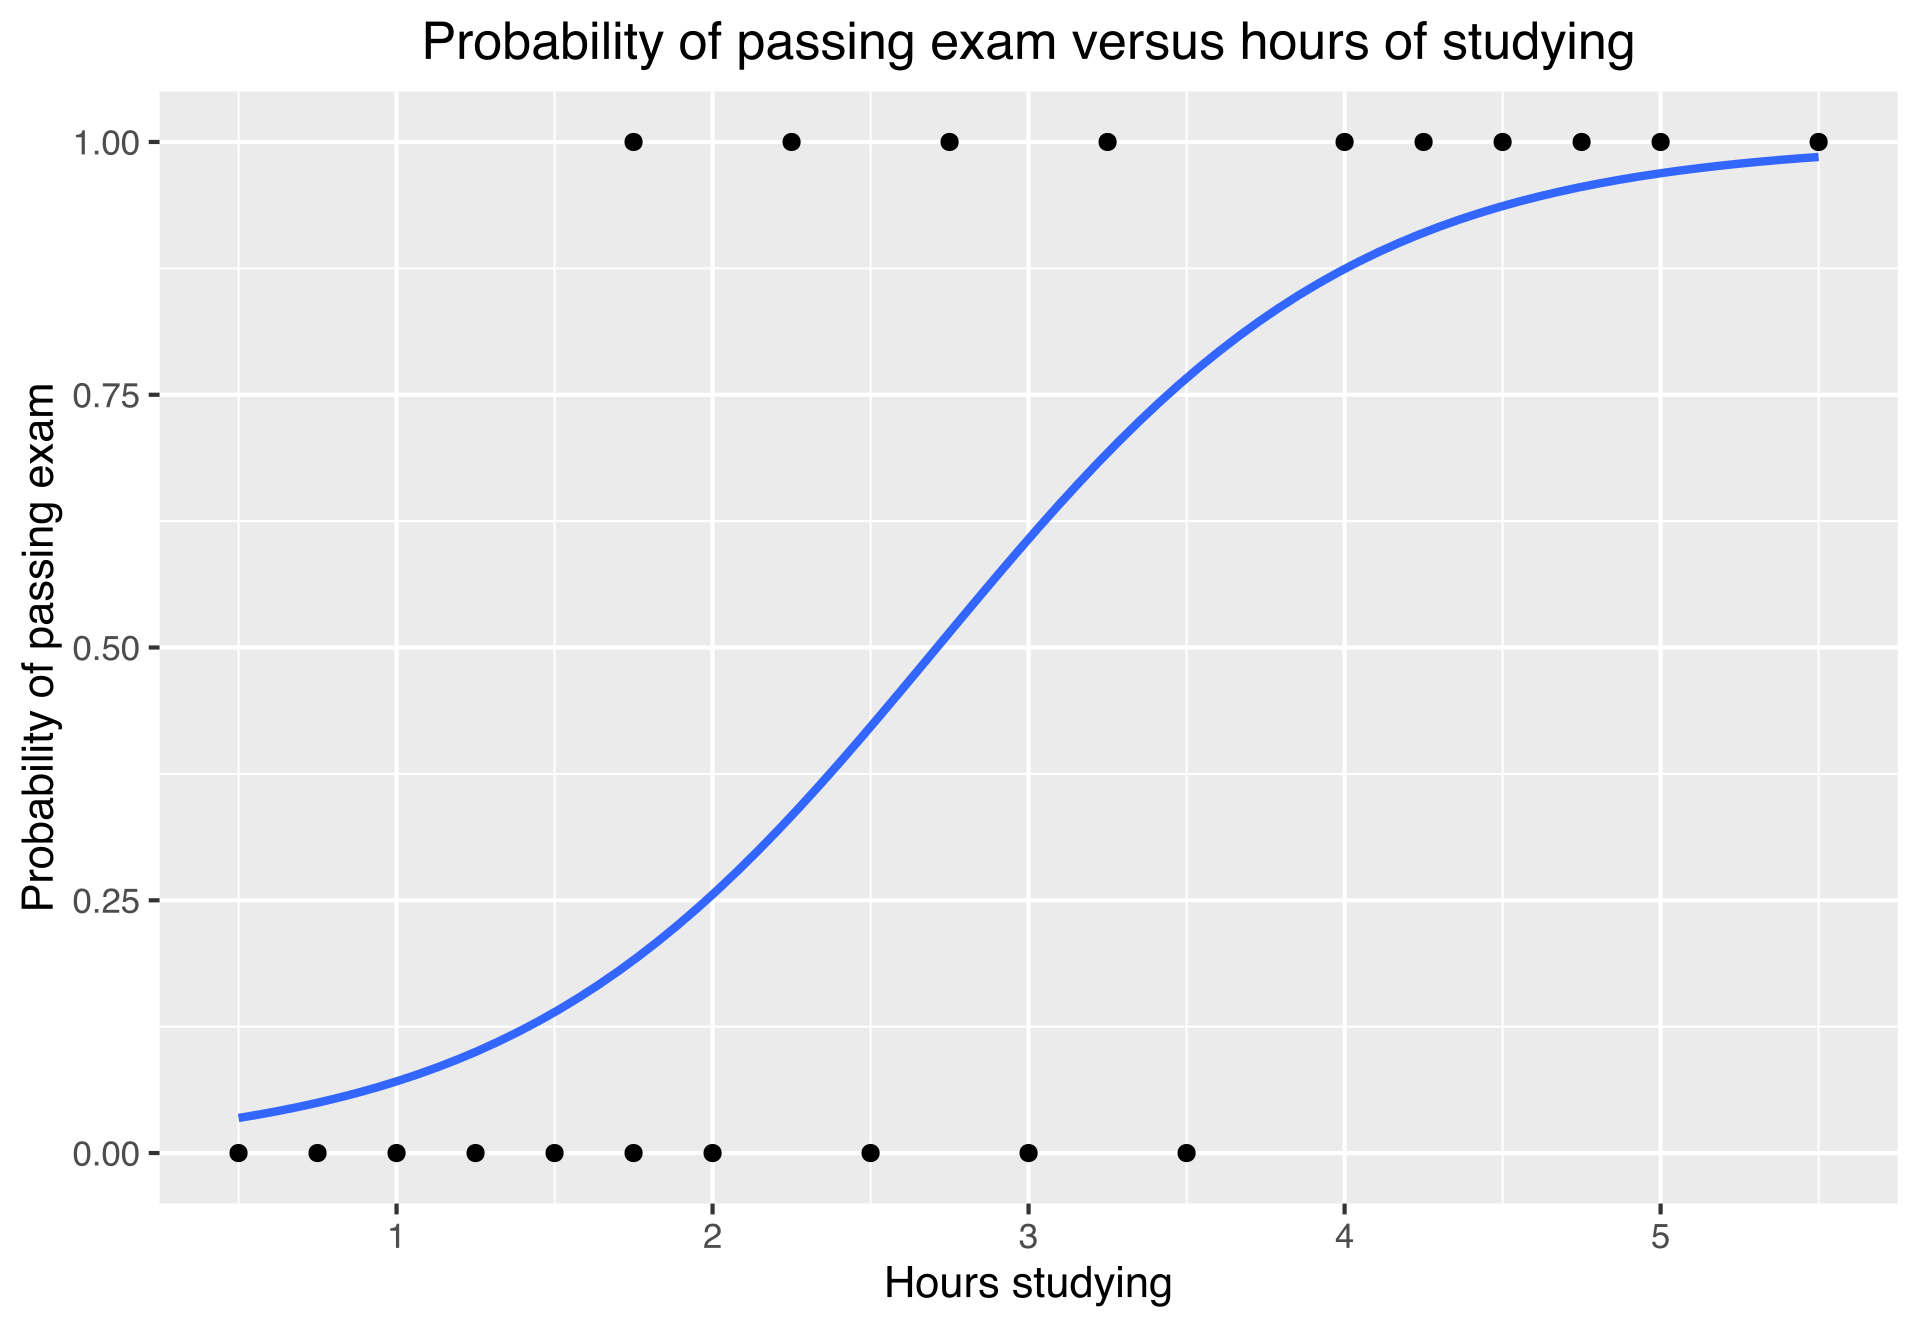

In [31]:
print("Image Credit: Wikipedia")

# image source: Wikipedia
from IPython import display
display.Image("./Exam_pass_logistic_curve.png", width = 500, height = 500)


Above example is based on the logistic regression. The plot is about the probability of passing the exam against the hours of studying. The blue line represents the logistic regression fit. 

The data indicates that on increasing the number of hours studying the probability of passing an exam increases. However, we can see few people with longer hours of studying but still were unable to pass the test and few of them were able to pass the test studying less hours.

Then if we set a threshold of 0.5 (can be any value between 0 to 1) that a random person is able to pass the test then we find that he has to (will) study for around 2.75 hours looking at a logistic regression curve. 

However, we find that some of the student (from given data set) pass the test studying less than 2.75 hours while some of them fail even though they study for more than that.

Now, here comes the confusion matrix. Confusion matrix is a special table layout that has information about the actual and predicted data from the given data set that define the performance of the classification algorithm. We need some threshold value so that we can classify the data set into different results (generally binary). It can only be determined if true values for the test data are known.


### Confusion Matrix

Confusion matrix of above example when threshold is set to 0.5 (prob. of passing the test) will be following:


<table style="width:40%" style = "height:1000%">
<thead>
<tr><th> </th><th>Actual = Fail</th><th>Actual = Pass</th></tr>
</thead>
<tbody>
<tr><td>Predicted = Fail</td><td>8</td><td>3</td></tr>
<tr><td>Predicted = Pass</td><td>2</td><td>7</td></tr>
</tbody>
</table>


The above table is confusion matrix when threshold of 0.5. If we change threshold the confusion matrix is subject to change. That means for N different values of threshold we have N number of confusion matrix.


#### The generalized form of confusion matrix (2*2) will be in the following form with the meaning of each if them.


<table style="width:50%" style = "height:1000%">
<thead>
<tr><th>n = total predictions</th><th>Actual = No</th><th>Actual = Yes</th></tr>
</thead>
<tbody>
<tr><td>Predicted = No</td><td>True Negative</td><td>False Positive</td></tr>
<tr><td>Predicted = Yes</td><td>False Negative</td><td>True Positive</td></tr>
</tbody>
</table>

Predicted values are the results from the model and the actual values are from the experiment itself. 
Followings are the meaning of few terminology in 2*2 confusion matrix:

1. True Negative = Model has predicted 'no' and same does the experiment.
2. True Positive = Model has predicted 'yes' and same does the experiment.
3. False Positive = Model has predicted 'yes' but experiment does not have that results. Also called "Type-I" error.
4. False Negative = Model has predicted 'no' but experiment produce the result. It is also called "Type-II" error.




Other accepted forms of confusion matrix is:


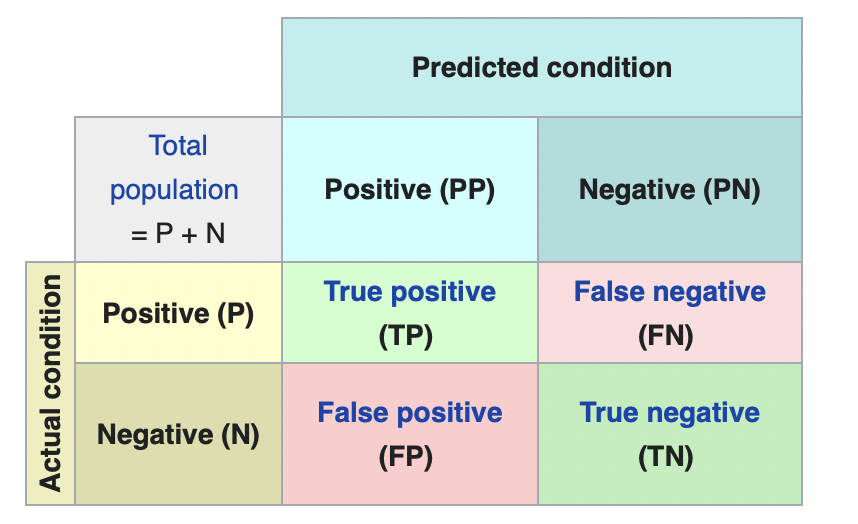

In [34]:
print('Other accepted forms of confusion matrix is:')

# image source: Wikipedia
from IPython import display
display.Image("./confusion_matirx.png", width = 500, height = 500)

In [36]:
print("Apart from 2*2 matrix, confusion matrix can be of higher dimensionality \
depending upon the number of variables.")
print()
print("Following example is 3*3 confusion matrix obtained from following URL:")
print()
print("https://towardsdatascience.com/confusion-matrix-for-your-\
multi-class-machine-learning-model-ff9aa3bf7826")

# import image module
from IPython.display import Image
  
# get the image
Image(url="higher_dimension_confusion_matrix.png", width=400, height=400)



Apart from 2*2 matrix, confusion matrix can be of higher dimensionality depending upon the number of variables.

Following example is 3*3 confusion matrix obtained from following URL:

https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826


## ROC Curve

ROC (Receiver Operating Characteristic) curve is the curve that summarizes all the confusion matrix obtained for different thresholds. ROC curve contains "True Positive Rate" (Sensitivity) in vertical axis and "False Positive Rate" (1 - Specificity) in horizontal axis. 

True Positive Rate (TPR) is calculated as: 
TPR = True Positive / (True Positive + False Negative)

Similarly, False Positive Rate (FPR) is calculated as:
FPR = False Positive / (False Positive + True Negative)

TPR and FPR are based on the row (or could be columns sometimes) of actual (experimental) values.

Sometimes, instead of FPR, precision is calculated which is defined as the proportion of the positive results that were correctly classified. 

The equation is : Precision = TP / (TP + FP)

When the study involves about the rare disease precision is more useful than FPR.

In general the curve looks like as follows:


Image source: Wikipedia


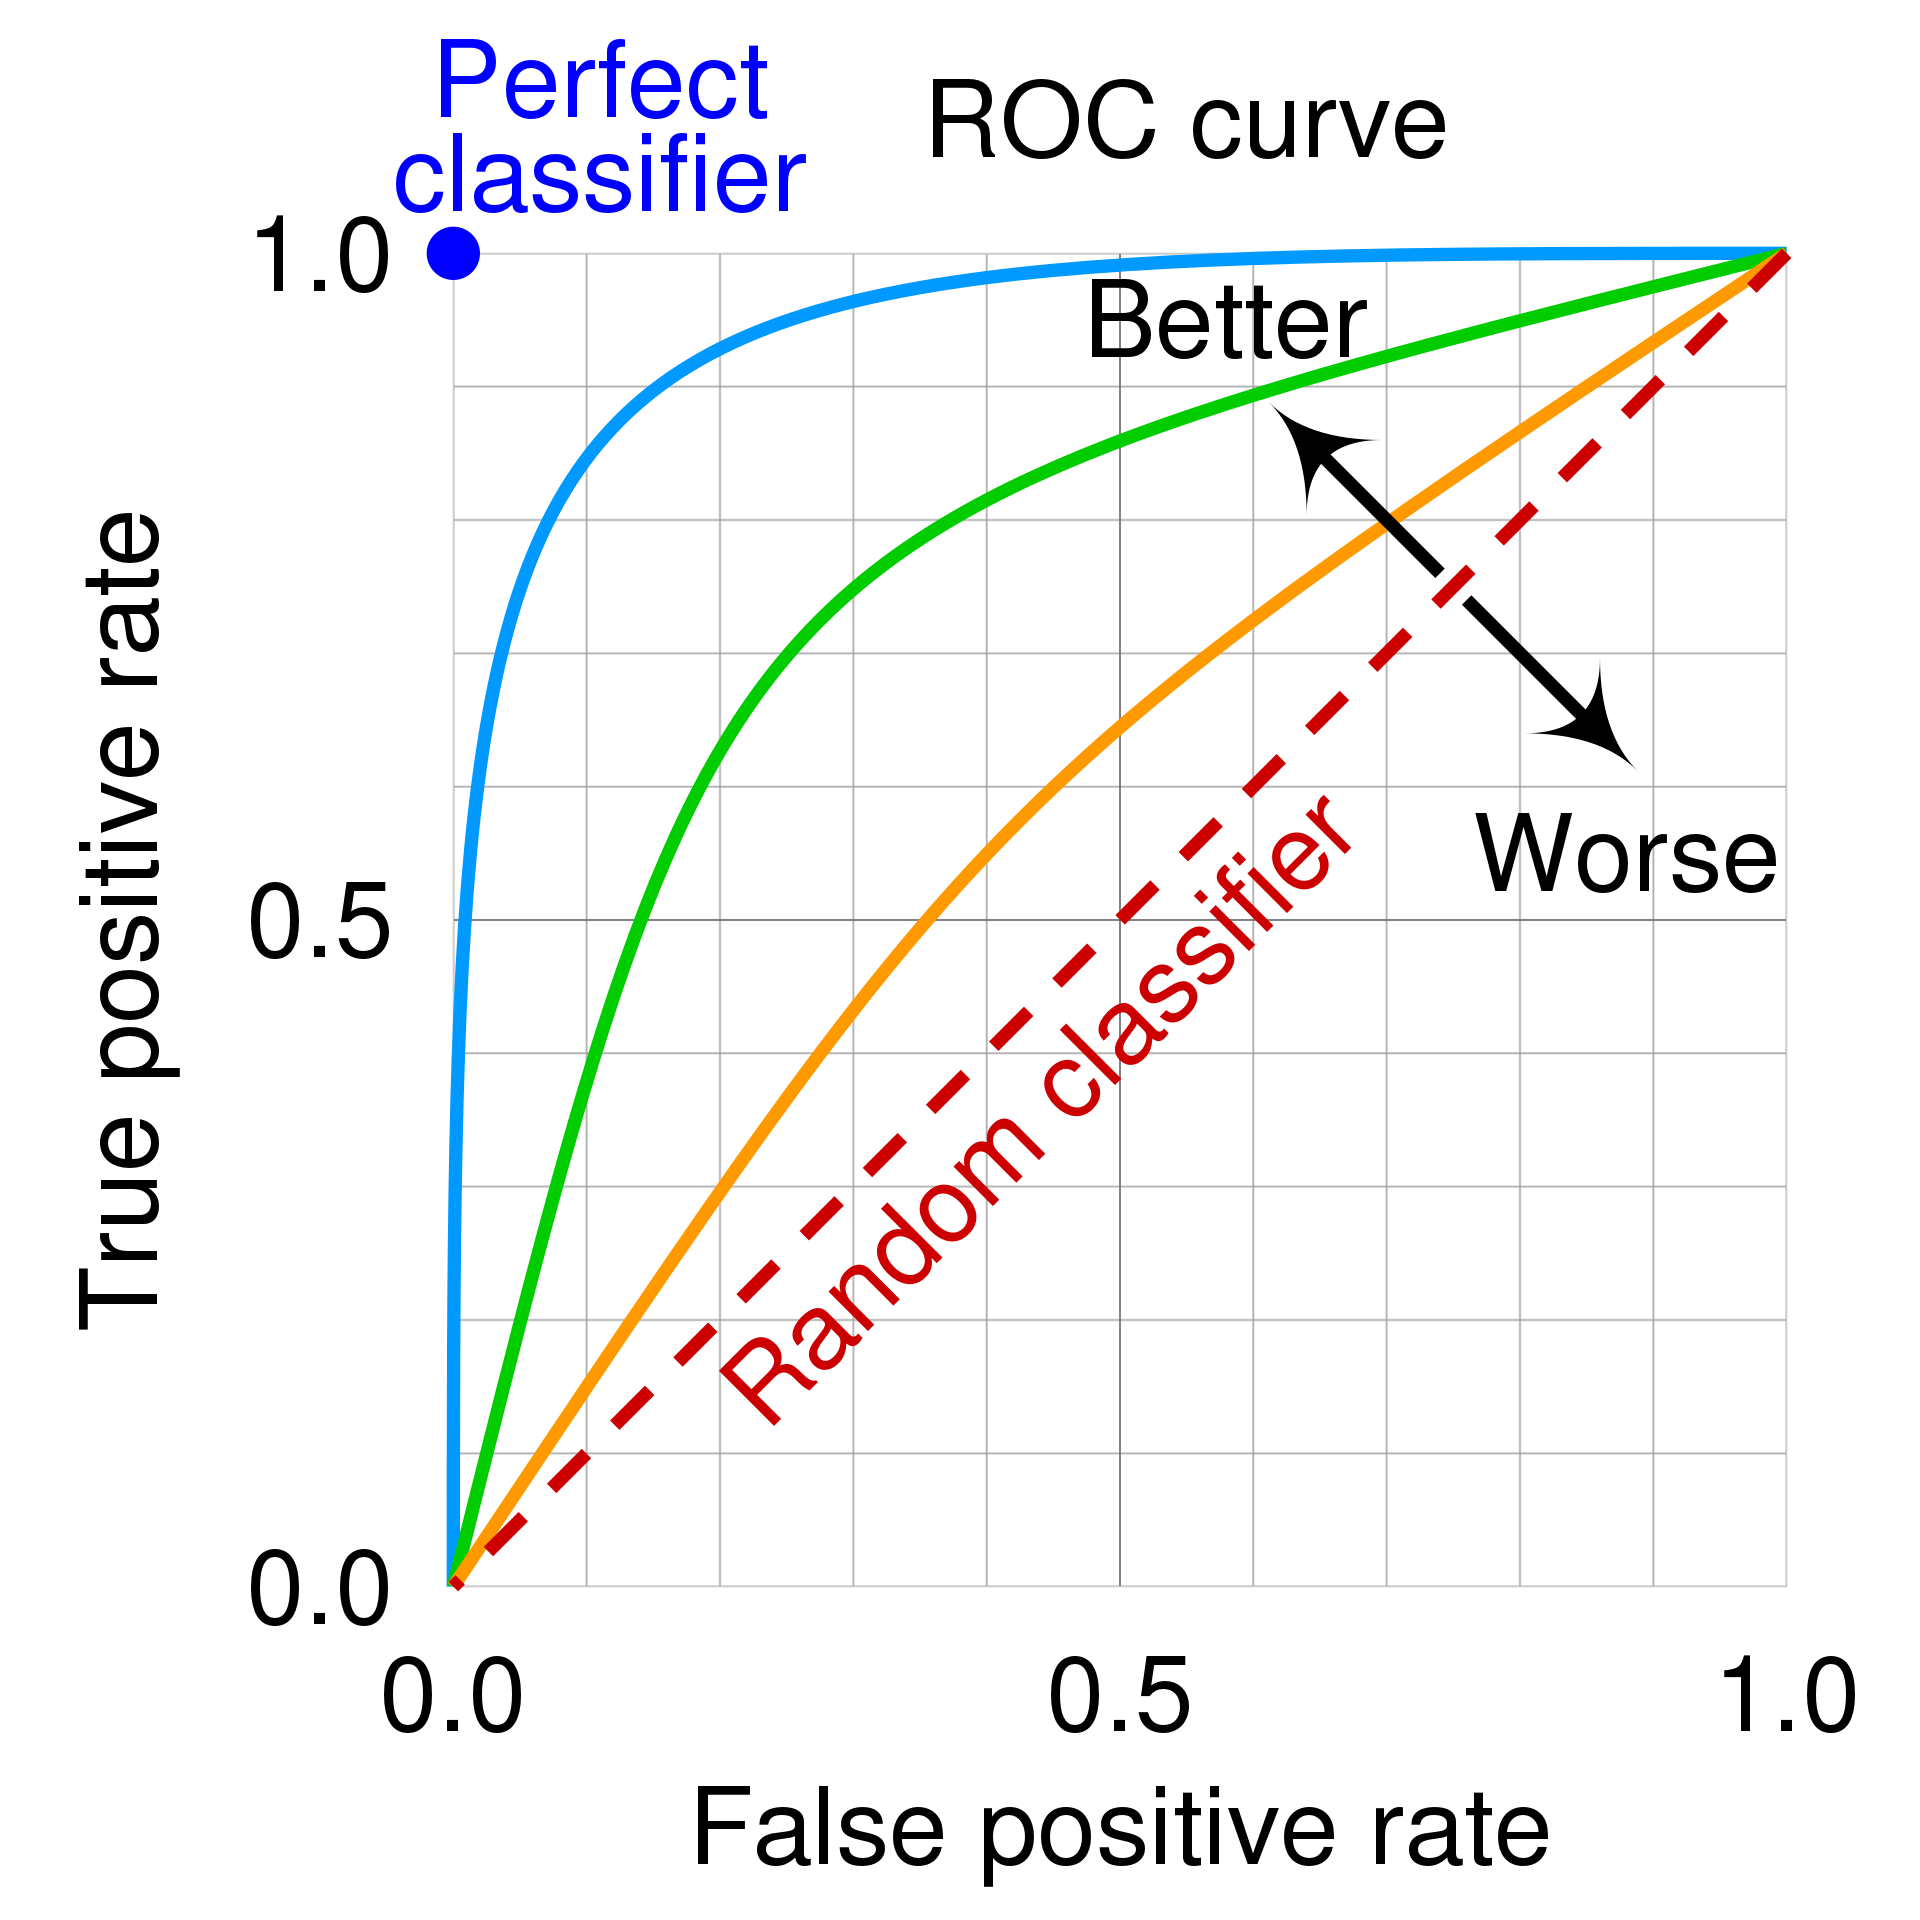

In [42]:
print('Image source: Wikipedia')

from IPython import display
display.Image("./roc_curve.png", width = 400, height = 400)

The image above contains four ROC curves. For each ROC curve, the curve is obtained by calculating TPR and FPR from confusion matrix using different threshold values.

ROC curve is useful to estimate the optimal value of threshold. It is corresponding to the nearest data point in ROC curve from the perfect classifier (shown by blue dot).

AUC means area under ROC curve and is useful to identify which method of charaterization is better among all.
It compares one curve with other and the curve that traces largest area is the best characterization method. 

In the above plots the curve with Blue color traces the maximum area, so is the best characterization method among all. The random classifier runs the plot with slope = 1 .



## Summary:

ROC = decide what threshold value to use

AUC = decide which characterization method is better

# Example of ROC

#### obtained from sci-kit learn

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    svm.SVC(kernel="linear", probability=True, random_state=random_state)
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

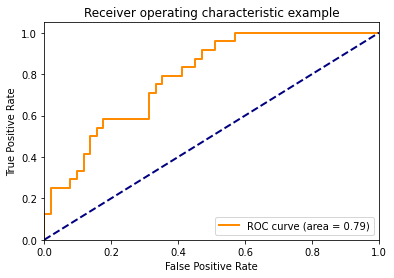

In [48]:
# Plot of a ROC curve for a specific class

plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

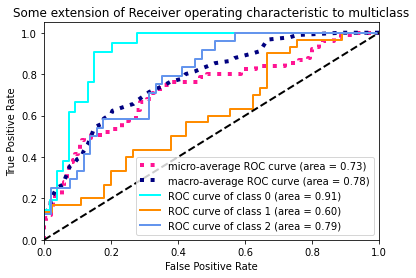

In [46]:
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [47]:
# Area under ROC for the multiclass problem


y_prob = classifier.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(
    y_test, y_prob, multi_class="ovo", average="weighted"
)
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(
    y_test, y_prob, multi_class="ovr", average="weighted"
)
print(
    "One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo)
)
print(
    "One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr)
)

One-vs-One ROC AUC scores:
0.698586 (macro),
0.665839 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.698586 (macro),
0.665839 (weighted by prevalence)
